In [48]:
#import libraries
import pandas as pd
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")


In [49]:
#set the working directory
working_directory = "C:/Users/ADMIN/Documents/Portfolio Project"
os.chdir = working_directory

In [50]:
#import data
df = pd.read_csv("C:/Users/ADMIN/Documents/Portfolio Project/heart_failure_clinical_records_dataset.csv")
#glimpse of the data
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [51]:
df = df.rename(columns={'DEATH_EVENT':'death_event'})

In [52]:
df.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

In [53]:
#size of the data
df.shape

(299, 13)

In [54]:
#check for missing values
df.isnull().sum().any()

False

In [55]:
#check for data types
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
death_event                   int64
dtype: object

In [56]:
#summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# EDA

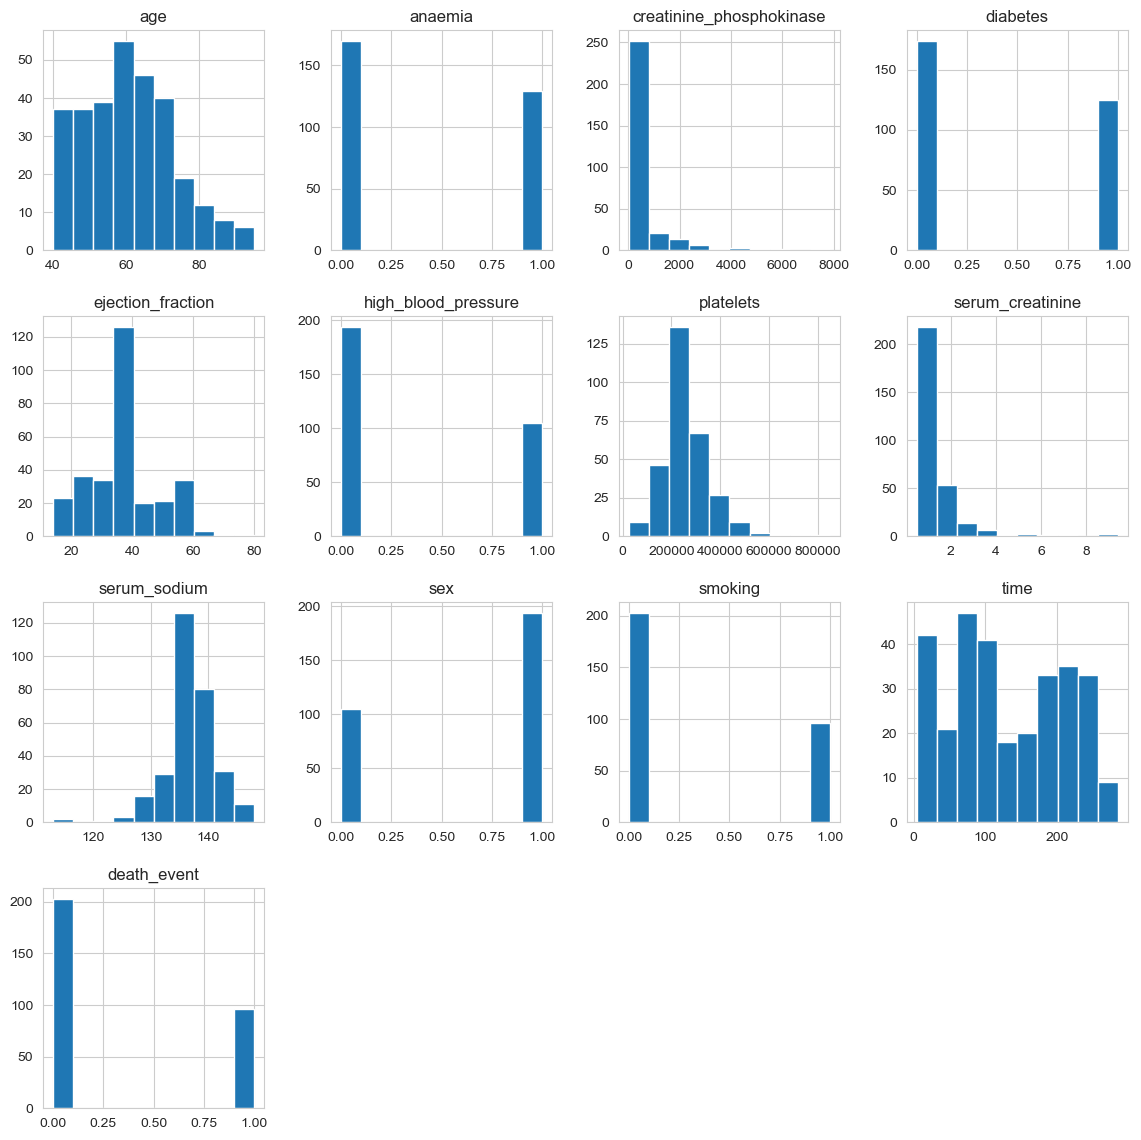

In [58]:
df.hist(figsize=(14,14))

plt.show()

In [59]:
#value counts of death events
df.death_event.value_counts()

death_event
0    203
1     96
Name: count, dtype: int64

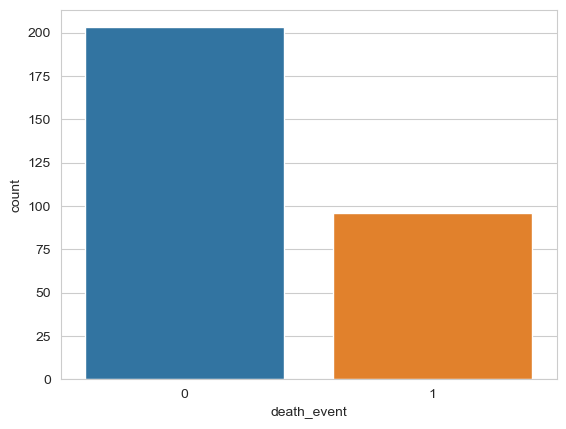

In [60]:
# Bar plot for 'death event'
sns.countplot(x='death_event', data=df)
plt.show()

In [61]:
df.groupby('death_event').mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
death_event,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


In [62]:
#value counts of sex
df['sex']=df['sex'].replace({'0':'male'})
df.sex.value_counts()

sex
1    194
0    105
Name: count, dtype: int64

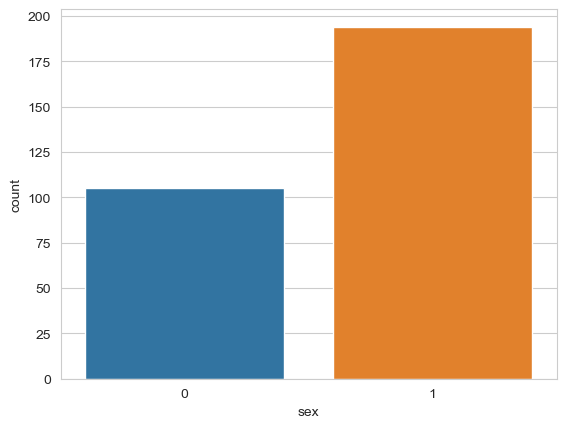

In [63]:
#bar plot of sex
sns.countplot(x='sex', data=df)
plt.show()

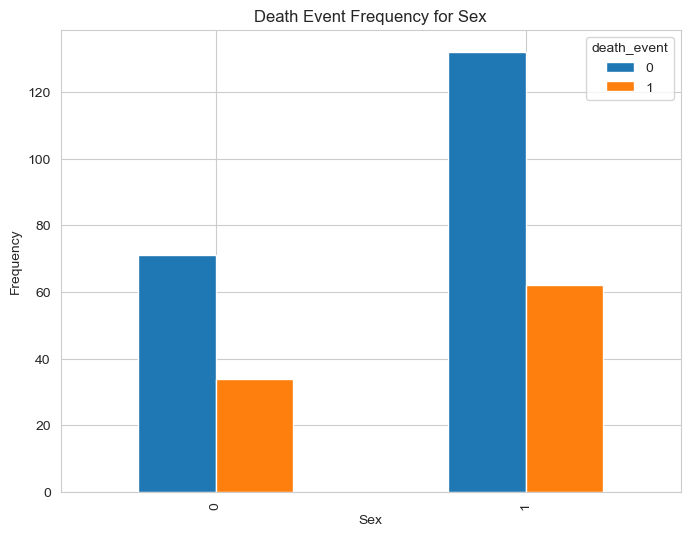

In [64]:
#death event frequency for sex
pd.crosstab(df.sex,df.death_event).plot(kind="bar",figsize=(8,6))
plt.title('Death Event Frequency for Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

high survival rate in both

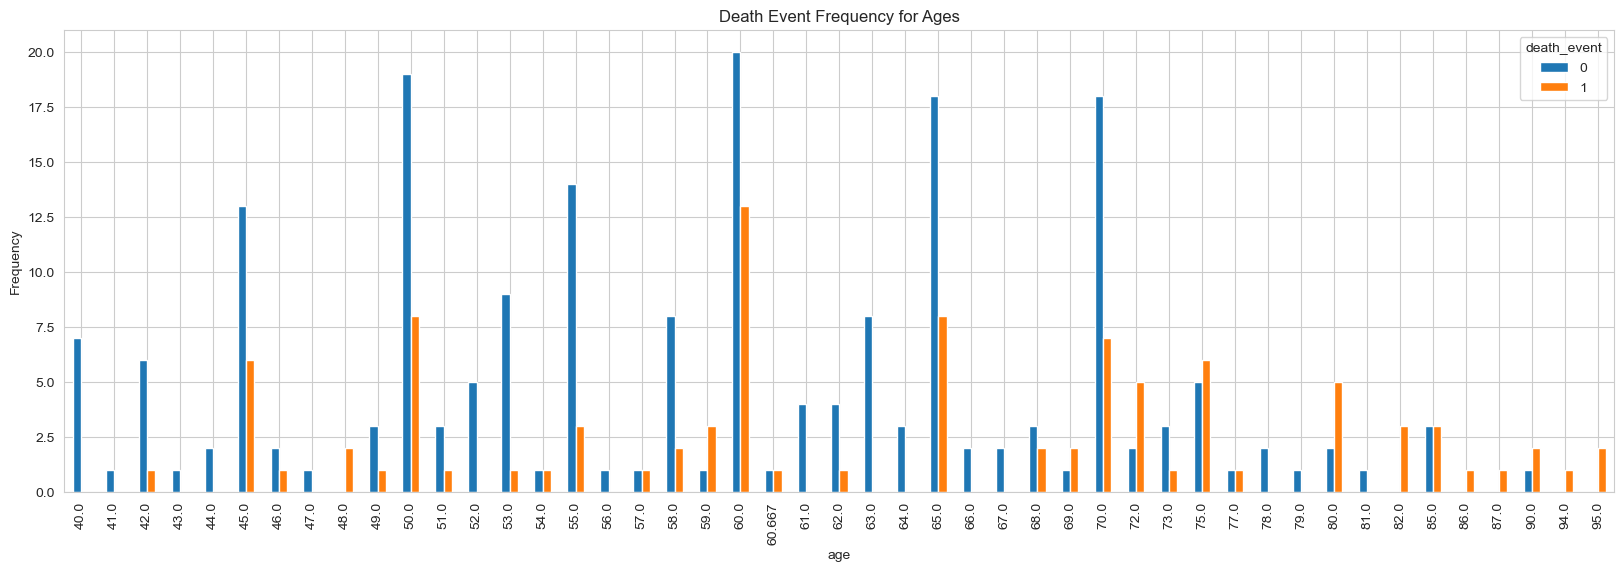

In [65]:
pd.crosstab(df.age,df.death_event).plot(kind="bar", figsize=(20, 6))
plt.title('Death Event Frequency for Ages')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()                                       

Higher rate of survival when younger than when older

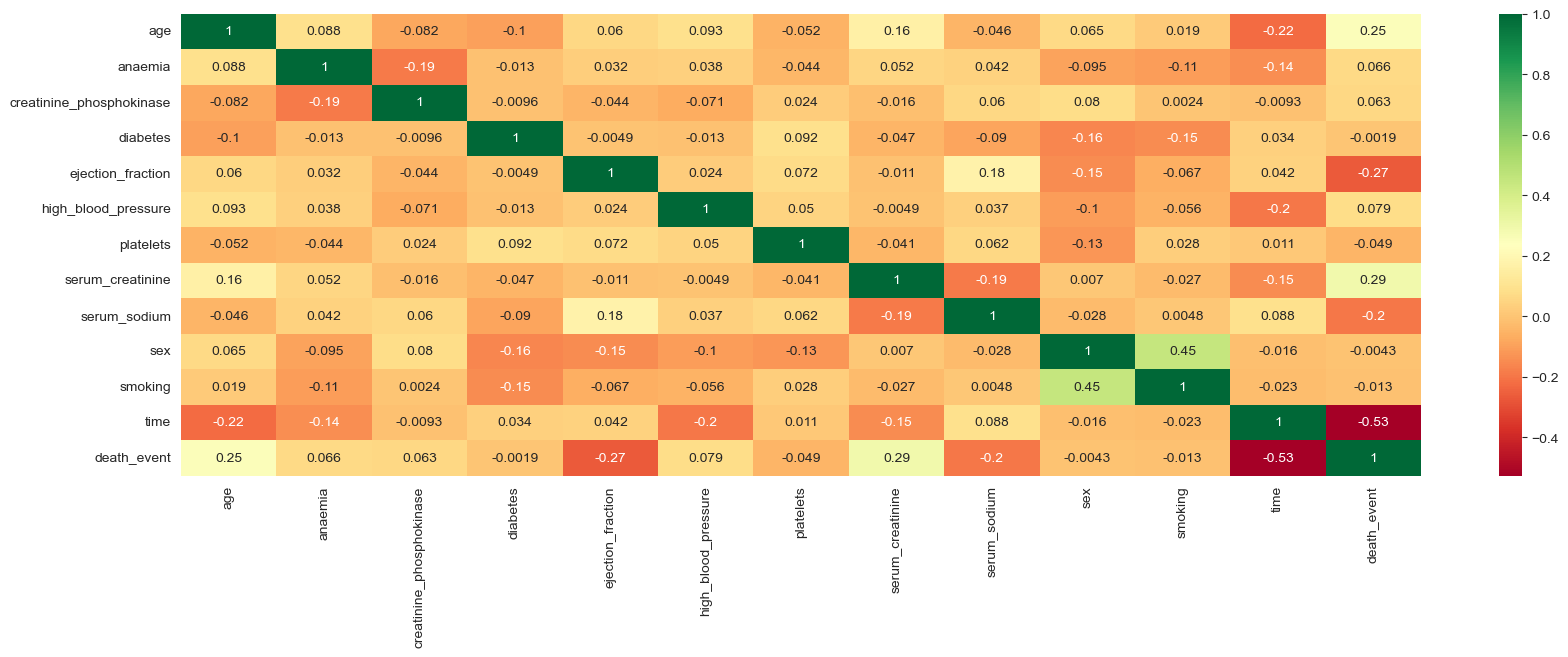

In [66]:
#heatmap for clean data
plt.figure(figsize=(20,6)) #set the size of figure to 12 by 10
p=sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [67]:
#drop target variable
X = df.drop(['death_event'], axis=1)

y = df['death_event']


In [68]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [69]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((239, 12), (60, 12))

Logistic Regression

In [70]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=1.0, max_iter=100)
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
from sklearn.metrics import accuracy_score
y_pred_lr = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)*100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 73.33%


Decision Tree 

In [72]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
y_pred_dt = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)*100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 75.00%


Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000, random_state = 1)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=1)

In [75]:
y_pred_rf = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_rf)*100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 85.00%


Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [77]:
y_pred_nb = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_nb)*100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 76.67%


In [78]:
#model evaluation
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)


array([[36,  1],
       [ 8, 15]], dtype=int64)

In [79]:
#import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        37
           1       0.94      0.65      0.77        23

    accuracy                           0.85        60
   macro avg       0.88      0.81      0.83        60
weighted avg       0.86      0.85      0.84        60

